In [1]:
from pedalboard import Pedalboard, Plugin, Chain, Mix, load_plugin
from pedalboard.io import AudioFile
import librosa
import matplotlib.pyplot as plt
from PluginUtil import *
from ParamOptim import *
from WriteFaust import *
from Plugins import *

In [11]:
a = load_plugin("./plg/addx.vst3/")

a.parameters.keys()

dict_keys(['add', 'bypass'])

In [2]:
with AudioFile("../tests/sin440.wav", 'r') as f:
    dry = f.read(f.frames)
    sr = f.samplerate

In [52]:
import copy

# Preload the plugin
template_plugin = load_plugin("./plg/add/addx.vst3/")

def Add(val) :
    plg = load_plugin("./plg/add/addx.vst3/")
    plg.add = val
    return plg


In [53]:
Add(val=1)


TypeError: cannot pickle 'pedalboard_native.VST3Plugin' object

In [66]:
plugs = [lambda x: np.array([a + 1 for a in x])]
# board = Chain([plugs])
wet = dry
for plugin in plugs:
    wet = plugin(wet)

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. pedalboard_native.Plugin()

Invoked with: [<function <lambda> at 0x310b3c550>]

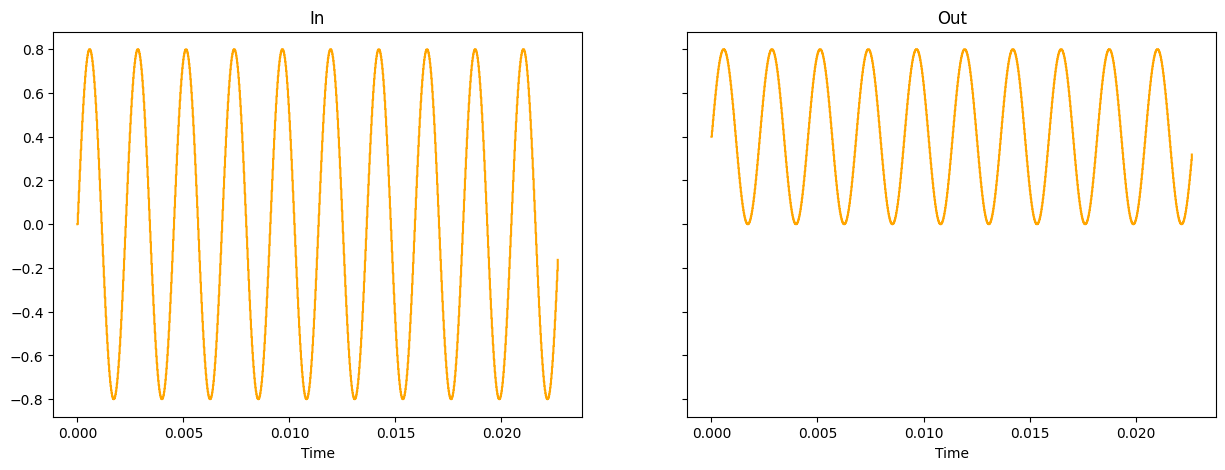

In [4]:
fig, ax = plt.subplots(1,2, figsize = (15,5), sharey = True)
ax[0].set(title = f'In')
librosa.display.waveshow(dry[0,0:1000], sr=sr, ax=ax[0], color="orange")
ax[1].set(title = f'Out')
board = Pedalboard([Add(val=0.8), Mul(val=0.5)])
librosa.display.waveshow(board(dry, sr)[0,0:1000], sr=sr, ax=ax[1], color="orange")